In [1]:
import matplotlib.pyplot as plt
import loompy
import numpy as np
import numpy_groupies as npg
from numpy_groupies.aggregate_numpy import aggregate
from colors import colorize
from sklearn.preprocessing import LabelEncoder

In [2]:
immune = 'HumanMeningesDev_Immune.loom'
immune_agg = 'HumanMeningesDev_Immune.agg.loom'

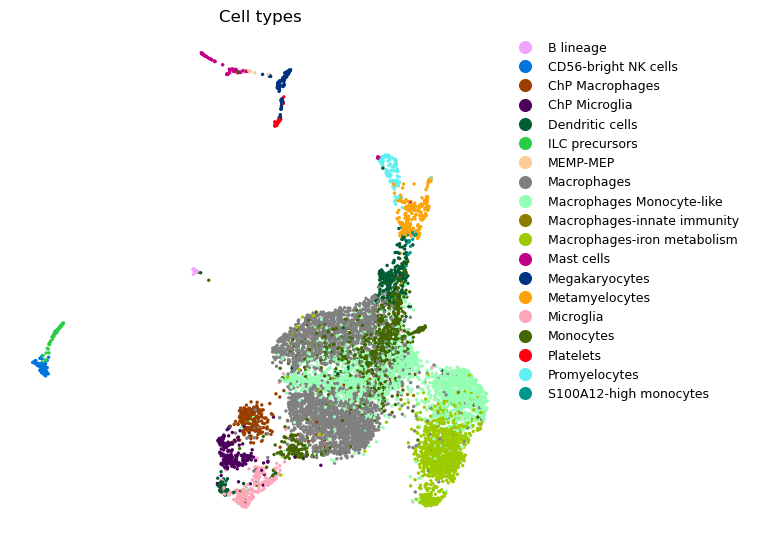

In [6]:
fig = plt.figure(None, (20, 5))
with loompy.connect(immune, 'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.CellType, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=6)
    ax.axis('off')
    plt.title("Cell types")
    
    ax2 = fig.add_axes([0.32, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.4,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

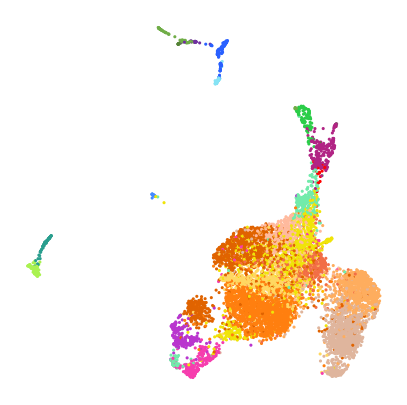

In [7]:
plt.figure(None, (5, 5))

class_color = {
    0: '#85E3F4',
    1: '#2960FF',
    2: '#448BFF',
    3: '#299E8E',
    4: '#AAF250',
    5: '#548235',
    6:'#70AD47',
    7:'#7030A0',
    8:'#2ACD48',
    9:'#B12484',
    10:'#FF0000',
    11:'#71EBAB',
    12:'#F63DAE',
    13:'#F63DAE',
    14:'#B935CE',
    15:'#E06300',
    16:'#FF7F0F',
    17:'#FFD761',
    18:'#F26E46',
    19:'#F0E408',
    20:'#E06300',
    21:'#DFB59D',
    22:'#FEAD5E',
    23:'#FFBA9E',
    24: '#FFB900'
}

with loompy.connect(immune, 'r') as ds:
    labels = np.array([class_color[x] for x in ds.ca.Clusters])
    cells = np.random.permutation(ds.shape[1])
    plt.scatter(ds.ca.UMAP[cells, 0], ds.ca.UMAP[cells, 1], c=labels[cells], s=5, lw=0, rasterized=True)
    plt.axis('off')

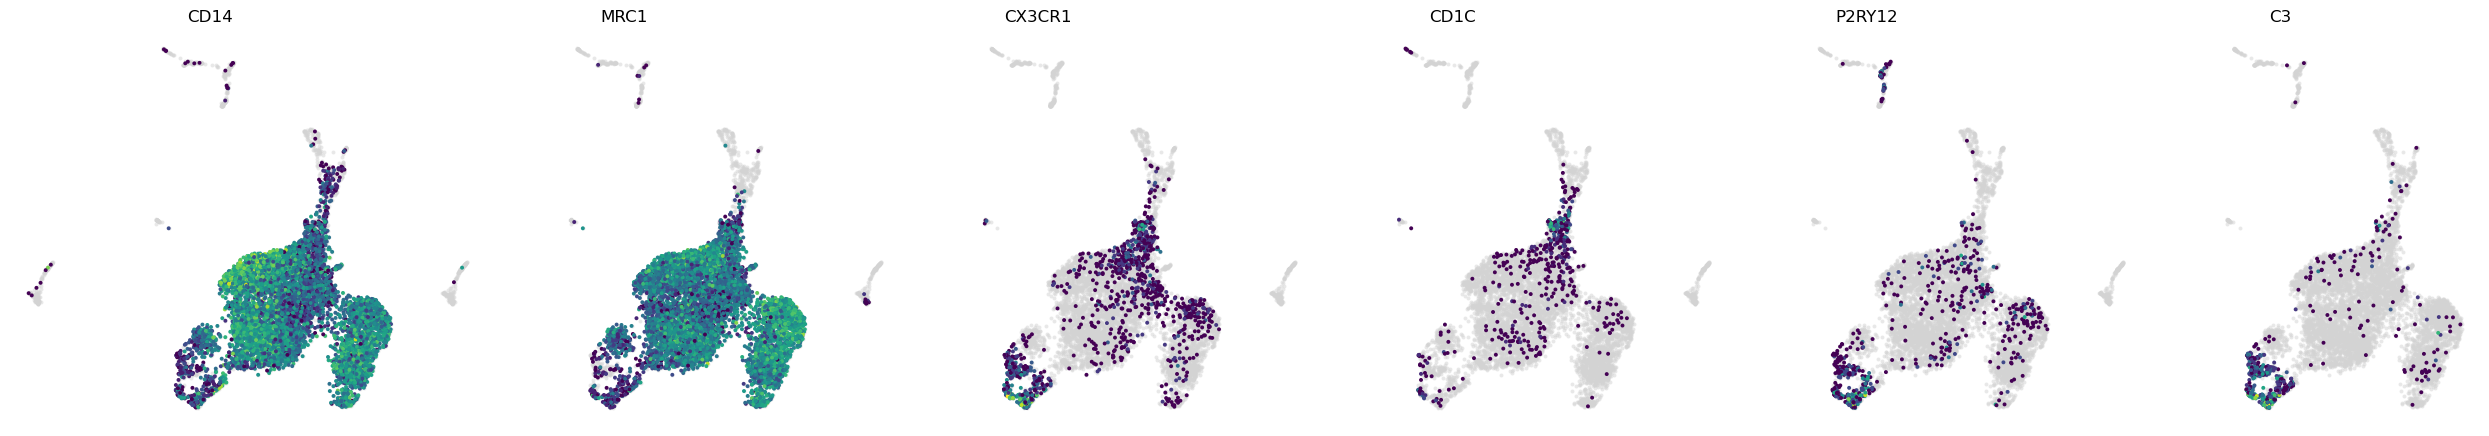

In [8]:
with loompy.connect(immune, 'r') as ds:
    plt.figure(None, (25, 25))
    gs = plt.GridSpec(6, 6)
    
    genes = ['CD14','MRC1','CX3CR1','CD1C','P2RY12','C3']

    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1) 
        ix = exp > 0 
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', lw=0, alpha=0.5, s=8)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=8)
        plt.axis('off')
        plt.tight_layout()
        plt.title(genes[i], fontsize=12) 

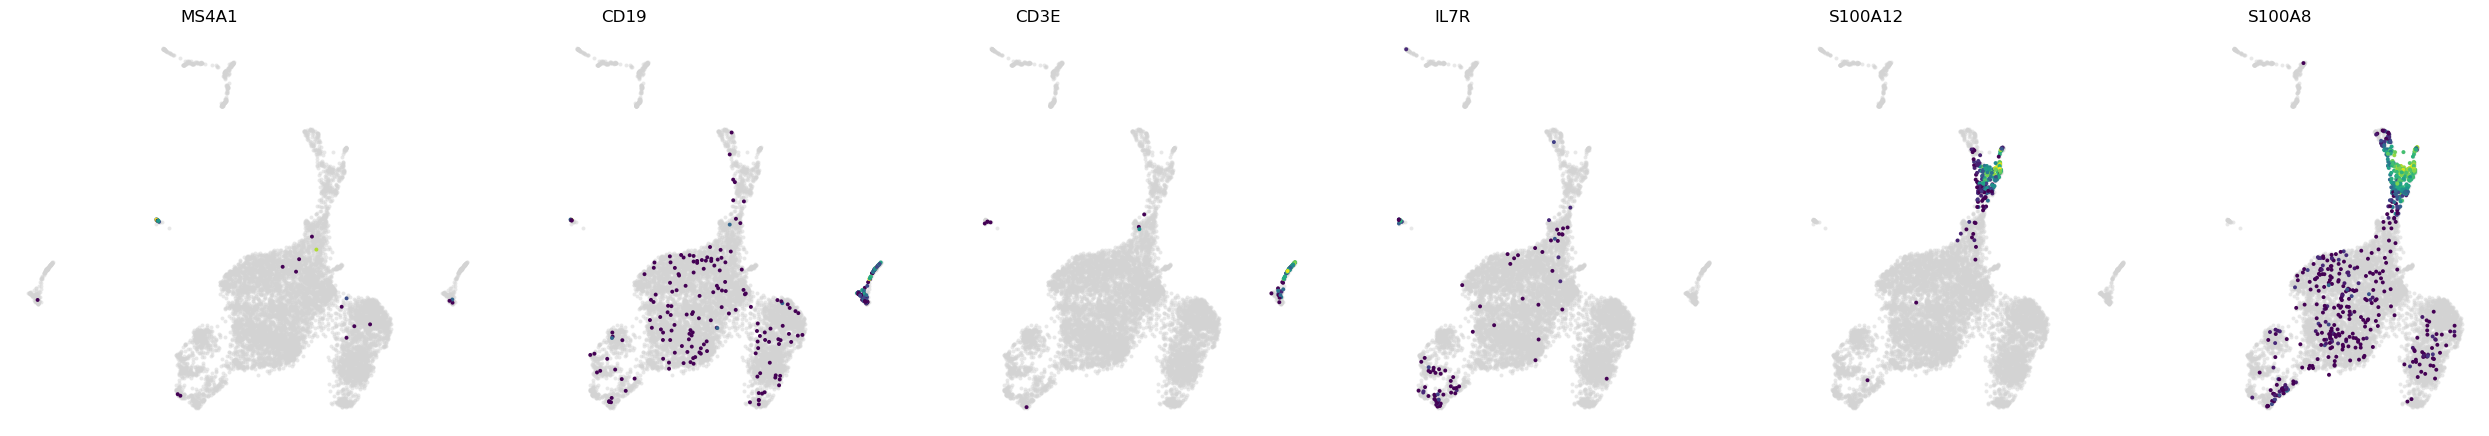

In [9]:
with loompy.connect(immune, 'r') as ds:
    plt.figure(None, (25, 25))
    gs = plt.GridSpec(6, 6)
    
    genes = ['MS4A1','CD19','CD3E','IL7R','S100A12','S100A8']
    
    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1) 
        ix = exp > 0 
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', lw=0, alpha=0.5, s=8)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=8)
        plt.axis('off')
        plt.tight_layout()
        plt.title(genes[i], fontsize=12) 

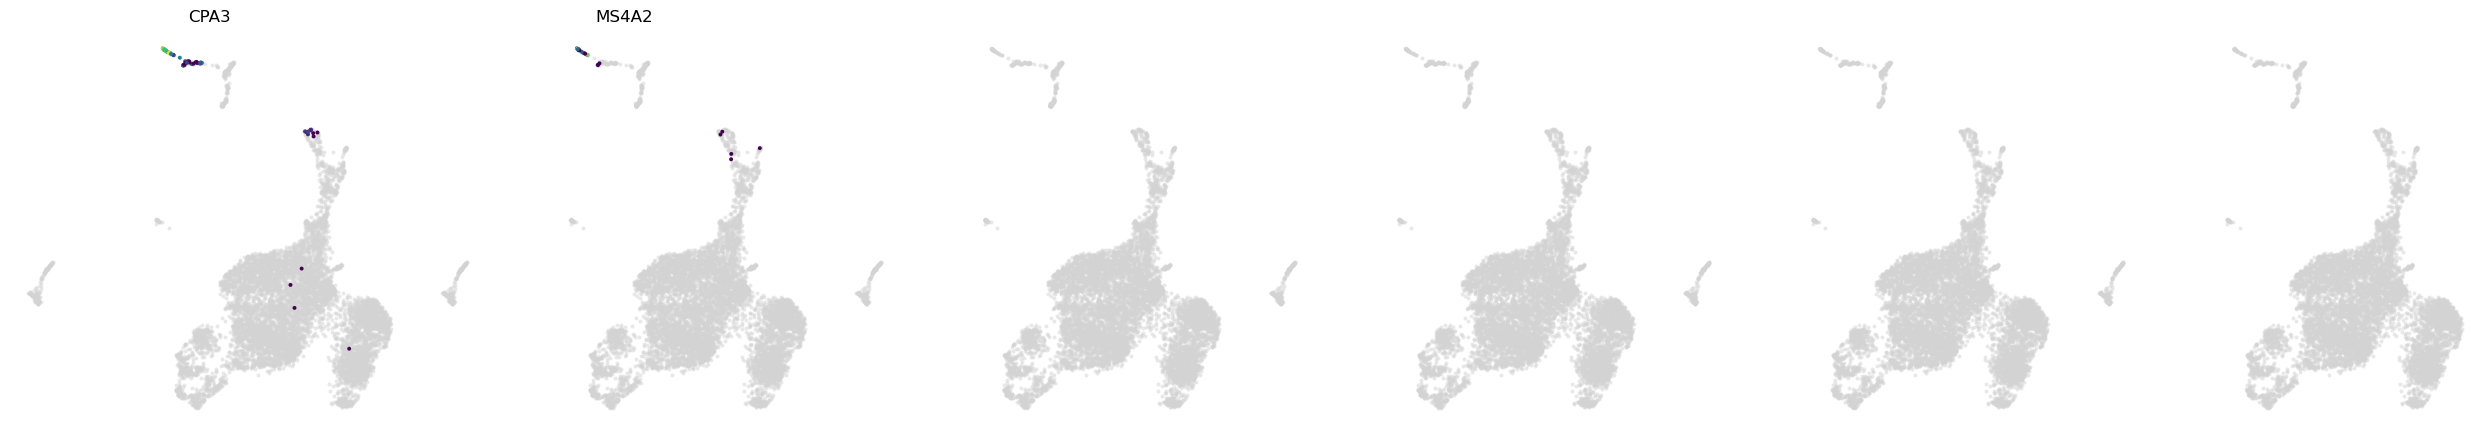

In [10]:
with loompy.connect(immune, 'r') as ds:
    plt.figure(None, (25, 25))
    gs = plt.GridSpec(6, 6)
    
    genes = ['CPA3','MS4A2','','','','']

    for i in range(len(genes)):
        plt.subplot(gs[i])
        exp = np.log(ds[ds.ra.Gene == genes[i], :].flatten() +1)
        ix = exp > 0 
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', lw=0, alpha=0.5, s=8)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=8)
        plt.axis('off')
        plt.tight_layout()
        plt.title(genes[i], fontsize=12) 

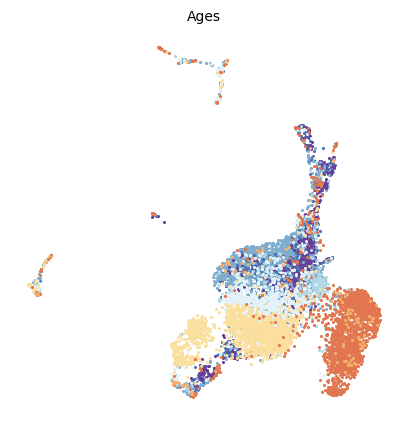

In [11]:
colors = ['#7EADCE','#4D74B2','#4D74B2','#683F97','#7EADCE','#B2D8E6','#FADF9E','#E3F2F9','#E3F2F9','#E17651','#F2B06C'] 
Age = ['7.5w','6.6w','6.7w','5.5w','7.6w','8.4w','10w','9w','9.9w','13.5w','12w']

plt.figure(None, (5,5))
with loompy.connect(immune, 'r') as ds:
    for i,a in enumerate(Age):
        exp = ds.ca.Agetext
        ix = (ds.ca.Agetext == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=5) #, c=colors[i], s=2
        plt.axis('off')
        plt.title('Ages',fontsize=10)

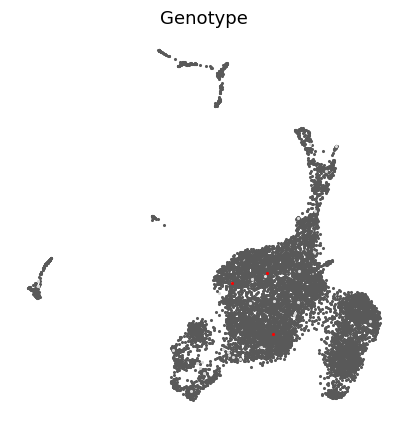

In [12]:
colors = ['#D9D9D9','#D9D9D9','#595959','#595959','#D9D9D9','#D9D9D9','#ff0000'] 
Age = ['doublet-0/1', 'n/a', 'unassigned-0', 'singlet-0','unassigned-0/1', 'unassigned-1/0', 'singlet-1']

plt.figure(None, (5,5))
with loompy.connect(immune, 'r') as ds:
    for i,a in enumerate(Age):
        exp = ds.ca.Souporcell
        ix = (ds.ca.Souporcell == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i],lw=0, s=5) #, c=colors[i]
        plt.axis('off')
        plt.title('Genotype',fontsize=13)

In [13]:
with loompy.connect(immune_agg,'r') as ds:
    nc_list = []
    for i in np.unique(ds.ca.Subclass):
        nc = round(((np.sum(ds.ca.NCells[ds.ca.Subclass == i]))/(np.sum(ds.ca.NCells))*100),1)
        nc_list.append(nc)
        print(i, ",", nc)
    print(nc_list)

B lineage , 0.3
CD56-bright NK cells , 1.1
ChP Macrophages , 3.0
ChP Microglia , 2.4
Dendritic cells , 3.2
ILC precursors , 1.0
MEMP-MEP , 0.2
Macrophages , 33.2
Macrophages Monocyte-like , 23.1
Macrophages-innate immunity , 0.2
Macrophages-iron metabolism , 12.3
Mast cells , 0.9
Megakaryocytes , 1.2
Metamyelocytes , 2.4
Microglia , 2.7
Monocytes , 10.9
Platelets , 0.5
Promyelocytes , 1.2
S100A12-high monocytes , 0.3
[0.3, 1.1, 3.0, 2.4, 3.2, 1.0, 0.2, 33.2, 23.1, 0.2, 12.3, 0.9, 1.2, 2.4, 2.7, 10.9, 0.5, 1.2, 0.3]


In [14]:
nc_list.sort(reverse=True)

In [15]:
print(nc_list)

[33.2, 23.1, 12.3, 10.9, 3.2, 3.0, 2.7, 2.4, 2.4, 1.2, 1.2, 1.1, 1.0, 0.9, 0.5, 0.3, 0.3, 0.2, 0.2]


In [16]:
strings = [str(x) for x in nc_list]
print(strings)

['33.2', '23.1', '12.3', '10.9', '3.2', '3.0', '2.7', '2.4', '2.4', '1.2', '1.2', '1.1', '1.0', '0.9', '0.5', '0.3', '0.3', '0.2', '0.2']


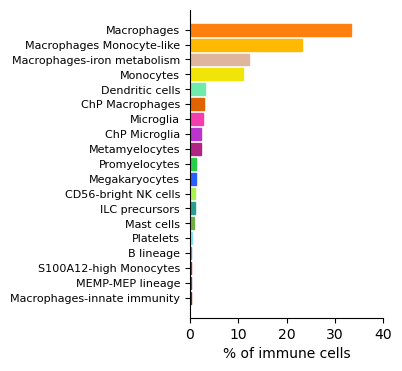

In [17]:
fig, ax = plt.subplots(figsize=(2.5,4))

colors = ['#FF7F0F', '#FFB900', '#DFB59D', '#F0E408', '#71EBAB', '#E06300', '#F63DAE',
         '#B935CE', '#B12484', '#2ACD48', '#2960FF', '#AAF250', '#299E8E', '#70AD47', '#85E3F4', '#448BFF','#FF0000', '#7030A0', '#C00000']

ytick = ['Macrophages','Macrophages Monocyte-like','Macrophages-iron metabolism','Monocytes','Dendritic cells',
         'ChP Macrophages','Microglia','ChP Microglia',
         'Metamyelocytes','Promyelocytes','Megakaryocytes',
         'CD56-bright NK cells','ILC precursors','Mast cells','Platelets','B lineage','S100A12-high Monocytes','MEMP-MEP lineage',
         'Macrophages-innate immunity']

x_pos = np.arange(len(ytick))
NCells = nc_list

bars = ax.barh(x_pos, NCells, color = colors, edgecolor = colors)
ax.set_yticks(x_pos, labels=ytick, fontsize = 8)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set(xlim=(0, 40))
ax.set_xlabel('% of immune cells')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.show()

In [18]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [19]:
with loompy.connect(immune,'r') as ds:
    subclass = ds.ca.Subclass
    age = ds.ca.Age

In [20]:
labels = np.unique(subclass)
counts = np.zeros((19, 14), dtype="int")  #(number of subclasses, number of timepoints) - meninges
for i, sc in enumerate(labels):
    print(sc)
    counts[i, :] = aggregate(age.astype("int"), (subclass == sc).astype("int"), func="sum")
print(counts)

B lineage
CD56-bright NK cells
ChP Macrophages
ChP Microglia
Dendritic cells
ILC precursors
MEMP-MEP
Macrophages
Macrophages Monocyte-like
Macrophages-innate immunity
Macrophages-iron metabolism
Mast cells
Megakaryocytes
Metamyelocytes
Microglia
Monocytes
Platelets
Promyelocytes
S100A12-high monocytes
[[   0    0    0    0    0    9    3    3    1    0    1    0    0    9]
 [   0    0    0    0    0    0    1   18    9    6   37    0    5   17]
 [   0    0    0    0    0    0    0    1    1    1  247    0    0    0]
 [   0    0    0    0    0    1    2    4    0    2  190    0    0    2]
 [   0    0    0    0    0   19   25   99   27   38   12    0   11   41]
 [   0    0    0    0    0    1    1   32    1    2   27    0    2   15]
 [   0    0    0    0    0    0    3   10    1    0    4    0    0    1]
 [   0    0    0    0    0   14   41 1076   73  127 1416    0   20   44]
 [   0    0    0    0    0    3   67  394  221  366   44    0   37  822]
 [   0    0    0    0    0    0    0    

In [21]:
ncounts = np.delete(counts, 11, axis=1) # - meninges

print(ncounts)
np.seterr(divide='ignore', invalid='ignore')
ncounts = ncounts / ncounts.sum(axis=0)
#ncounts = counts / counts.sum(axis=0)
print(ncounts)

[[   0    0    0    0    0    9    3    3    1    0    1    0    9]
 [   0    0    0    0    0    0    1   18    9    6   37    5   17]
 [   0    0    0    0    0    0    0    1    1    1  247    0    0]
 [   0    0    0    0    0    1    2    4    0    2  190    0    2]
 [   0    0    0    0    0   19   25   99   27   38   12   11   41]
 [   0    0    0    0    0    1    1   32    1    2   27    2   15]
 [   0    0    0    0    0    0    3   10    1    0    4    0    1]
 [   0    0    0    0    0   14   41 1076   73  127 1416   20   44]
 [   0    0    0    0    0    3   67  394  221  366   44   37  822]
 [   0    0    0    0    0    0    0    9    0    0    0    1    6]
 [   0    0    0    0    0    0    0    3    0    2    3   30 1001]
 [   0    0    0    0    0    3    8   22    5    4   11    1   25]
 [   0    0    0    0    0    5    6   35   11   13   23    1    6]
 [   0    0    0    0    0   48   51   69    6    2    7    1   22]
 [   0    0    0    0    0   46   25   81   24  

In [22]:
['B cell & Plasma cell' 'ChP Macrophage' 'ChP Microglia' 'Dendritic cell'
 'MEMP-MEP' 'Macrophage' 'Macrophage Monocyte-like'
 'Macrophage-innate immunity' 'Macrophage-iron metabolism' 'Mast cell'
 'Megakaryocyte' 'Microglia' 'Monocyte' 'Monocyte-Neutrophil lineage'
 'Neutrophil-Metamyelocyte' 'Neutrophil-Promyelocyte' 'Platelet'
 'T cell-CD4/CD8 rest' 'T cell-cytotoxic']
colors = ['#448BFF', '#E06300', '#B935CE', '#71EBAB', '#7030A0', '#FF7F0F', '#FFB900', '#C00000', '#DFB59D', '#70AD47',
         '#2960FF', '#F63DAE', '#F0E408', '#FF0000', '#B12484', '#2ACD48', '#85E3F4', '#299E8E', '#AAF250']

In [24]:
with loompy.connect(immune,'r') as ds:
    print(np.unique(ds.ca.CellType))

['B lineage' 'CD56-bright NK cells' 'ChP Macrophages' 'ChP Microglia'
 'Dendritic cells' 'ILC precursors' 'MEMP-MEP' 'Macrophages'
 'Macrophages Monocyte-like' 'Macrophages-innate immunity'
 'Macrophages-iron metabolism' 'Mast cells' 'Megakaryocytes'
 'Metamyelocytes' 'Microglia' 'Monocytes' 'Platelets' 'Promyelocytes'
 'S100A12-high monocytes']


Text(0.5, 1.0, 'Meninges')

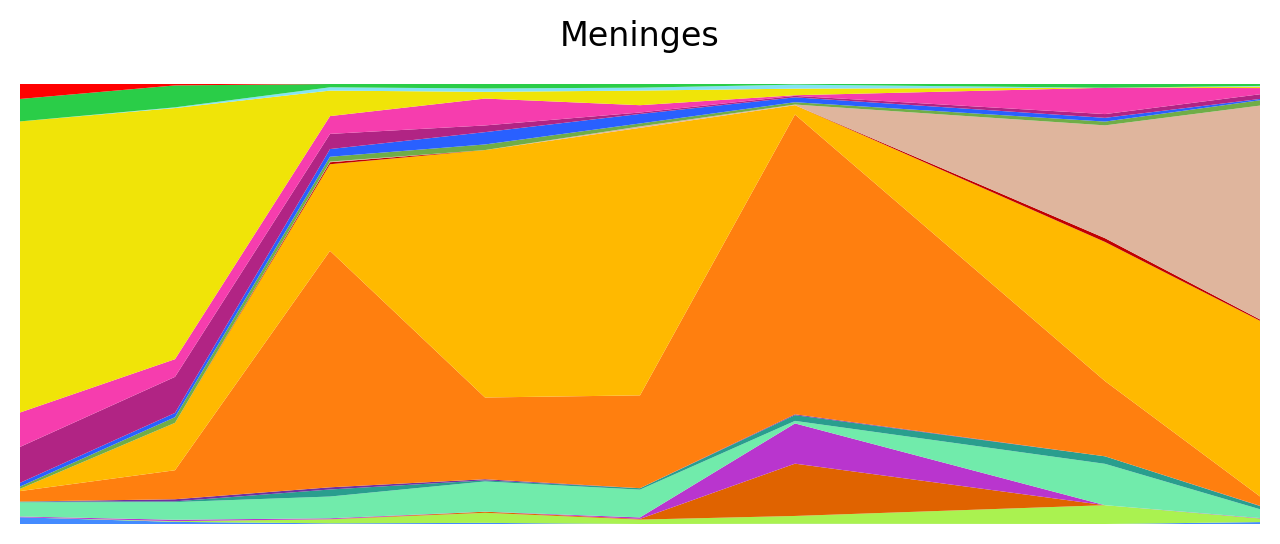

In [25]:
colors = ['#448BFF', '#AAF250', '#E06300', '#B935CE', '#71EBAB', '#299E8E', '#7030A0', '#FF7F0F', '#FFB900', '#C00000', '#DFB59D', '#70AD47',
         '#2960FF', '#B12484', '#F63DAE', '#F0E408', '#85E3F4', '#2ACD48', '#FF0000']

plt.figure(figsize=(8,3)) 
x = np.arange(14)
x = np.delete(x, 11)
plt.stackplot(x, ncounts, labels=labels, colors=colors)
plt.xlim(5, 13)
#plt.legend(loc='upper right', fontsize=8)
plt.axis("off")
plt.title('Meninges')
#plt.savefig('IMM_over_time.pdf',dpi=300)

# Enriched genes per class

In [26]:
with loompy.connect(immune, 'r') as ds:
    labels = ds.ca.CellType
    print(labels)

['Platelets' 'Platelets' 'Platelets' ... 'Macrophages-innate immunity'
 'Macrophages-innate immunity' 'Macrophages-innate immunity']


In [27]:
le = LabelEncoder().fit(labels)

In [28]:
label_ix = le.transform(labels)
label_ix

array([16, 16, 16, ...,  9,  9,  9])

In [29]:
le.inverse_transform(label_ix) #when you want to find the labels corresponding to the numbers again

array(['Platelets', 'Platelets', 'Platelets', ...,
       'Macrophages-innate immunity', 'Macrophages-innate immunity',
       'Macrophages-innate immunity'], dtype=object)

In [30]:
with loompy.connect(immune, 'r') as ds:

    labels = ds.ca.CellType
    le = LabelEncoder().fit(labels)
    label_ix = le.transform(labels)
    means = npg.aggregate(label_ix, ds[:, :], func='mean', axis=1)

In [31]:
with loompy.connect(immune, 'r') as ds:
    batch_size = 1000
    n_clusters = label_ix.max() + 1
    nonzeros = np.empty((ds.shape[0], n_clusters))

    for ix in range(0, ds.shape[0], batch_size):
        vals = ds[ix:ix + batch_size, :]
        nnz = npg.aggregate(label_ix, vals > 0, func='sum', axis=1)
        nonzeros[ix:ix + batch_size, :] = nnz

In [32]:
n_clusters = means.shape[1]
cluster_size = np.bincount(label_ix)
f_nnz = nonzeros / cluster_size

# calculate enrichment scores
enrichment = np.zeros_like(means)
for j in range(n_clusters):
    # calculate cluster weights
    ix = np.arange(n_clusters) != j
    weights = cluster_size[ix] / cluster_size[ix].sum()
    # calculate means_other as weighted average
    means_other = np.average(means[:, ix], weights=weights, axis=1)
    # calculate f_nnz as weighted average
    f_nnz_other = np.average(f_nnz[:, ix], weights=weights, axis=1)
    # calculate enrichment
    enrichment[:, j] = (f_nnz[:, j] + 0.1) / (f_nnz_other + 0.1) * (means[:, j] + 0.01) / (means_other + 0.01)

In [33]:
dict(zip(label_ix, le.inverse_transform(label_ix))) 

{16: 'Platelets',
 12: 'Megakaryocytes',
 0: 'B lineage',
 5: 'ILC precursors',
 1: 'CD56-bright NK cells',
 11: 'Mast cells',
 6: 'MEMP-MEP',
 17: 'Promyelocytes',
 13: 'Metamyelocytes',
 18: 'S100A12-high monocytes',
 4: 'Dendritic cells',
 14: 'Microglia',
 3: 'ChP Microglia',
 2: 'ChP Macrophages',
 7: 'Macrophages',
 8: 'Macrophages Monocyte-like',
 15: 'Monocytes',
 10: 'Macrophages-iron metabolism',
 9: 'Macrophages-innate immunity'}

In [34]:
with loompy.connect(immune, 'r') as ds:
    top_genes = ds.ra.Gene[np.argsort(enrichment[:, 0])[::-1]] #
top_genes[:10]

array(['JCHAIN', 'IGHM', 'VPREB3', 'IGLL1', 'IGKC', 'VPREB1', 'TCL1A',
       'IGLC2', 'PAX5', 'MS4A1'], dtype=object)

In [35]:
with loompy.connect(immune, 'r') as ds:    
    n_labels = label_ix.max() + 1
    (print(n_labels))
    n_markers = 3

    included = []
    for ix in range(n_labels):
        print(ix)
        enriched = np.argsort(enrichment[:, ix])[::-1]
        n = 0
        count = 0
        while count < n_markers:
            included.append(enriched[n])
            n += 1
            count += 1
            
    markers = np.array(included)
    print(ds.ra.Gene[markers])

19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
['JCHAIN' 'IGHM' 'VPREB3' 'IFNG' 'XCL1' 'XCL2' 'FOLR1' 'C2orf40' 'TTR'
 'HTRA1' 'AP003481.1' 'C3' 'HLA-DPA1' 'HLA-DQA1' 'HLA-DPB1' 'IL7R' 'TRBC1'
 'AQP3' 'HBD' 'FCER1A' 'TESPA1' 'DKK2' 'CCL13' 'XIST' 'HS3ST4' 'PID1'
 'KCNA5' 'IFIT1' 'IFIT3' 'IFIT2' 'NUPR1' 'AC110023.1' 'HS3ST2' 'TPSB2'
 'CLC' 'CPA3' 'PPBP' 'PF4' 'TUBB1' 'S100A12' 'S100A8' 'CDA' 'PDPN' 'C3'
 'HTRA1' 'MT1G' 'AC104389.4' 'MT1H' 'GPC5' 'KEL' 'AC113414.1' 'PRTN3'
 'AZU1' 'MPO' 'CSTA' 'TNNT1' 'FCN1']


In [36]:
label_ix

array([16, 16, 16, ...,  9,  9,  9])

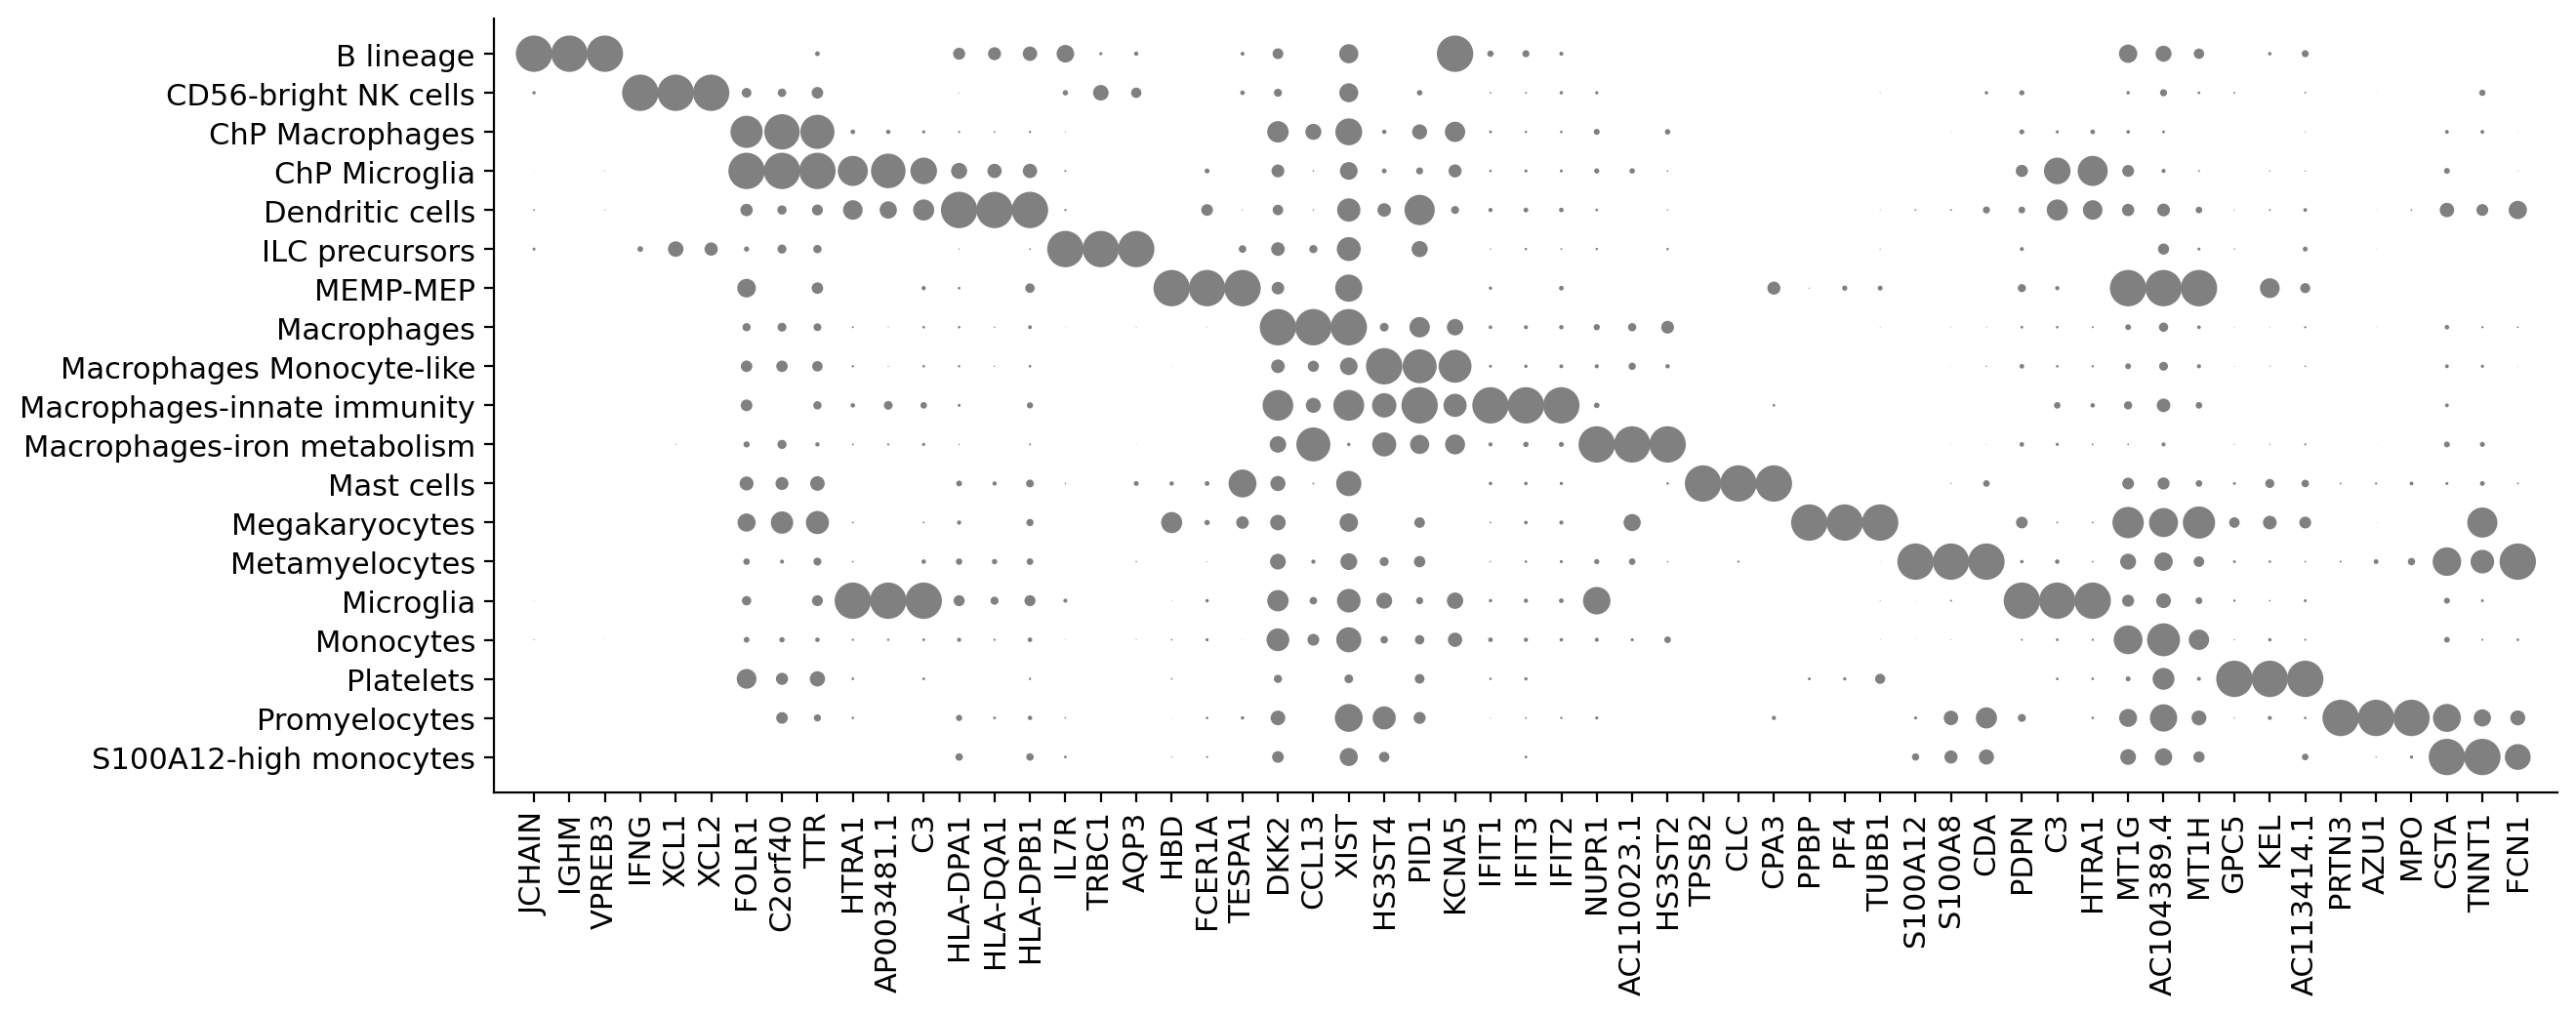

In [37]:
tick_labels = ['B lineage', 'CD56-bright NK cells', 'ChP Macrophages', 'ChP Microglia','Dendritic cells', 'ILC precursors' ,'MEMP-MEP' ,'Macrophages',
 'Macrophages Monocyte-like', 'Macrophages-innate immunity','Macrophages-iron metabolism', 'Mast cells' ,'Megakaryocytes',
 'Metamyelocytes', 'Microglia', 'Monocytes', 'Platelets', 'Promyelocytes','S100A12-high monocytes']

with loompy.connect(immune, 'r') as ds:
    plt.figure(figsize = (13, 5), tight_layout = {'pad': 0})
    
    genes = ds.ra.Gene[markers] #genes
    unique_clusters = np.unique(label_ix) 
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    means = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        means[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        means[:, i] = means[:, i] / means[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=means.flatten()*180, c='grey', lw=0) #s=fnnz.flatten()*150, c=means.flatten()
    
    # label ticks
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=11) #tick_labels,
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical', fontsize=11)
    
    # margins and invert y axis
    plt.margins(0.02, 0.05)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.rcParams['pdf.fonttype'] = 42
    #plt.savefig('IMM_subclass_enriched4.pdf', dpi=300)

## B lineage analysis, see:

Fig2_A1_heatmap_combined_dotplot_for_B_cell_markers_meningesMS_ys_men_fbm_SW.ipynb
SFig2_A1_heatmap_dotplot_for_B_cell_markers_meninges_SW.ipynb

# ERYTHROCYTES

In [38]:
erythropoietic = 'HumanMeningesDev_Erythropoietic.loom'

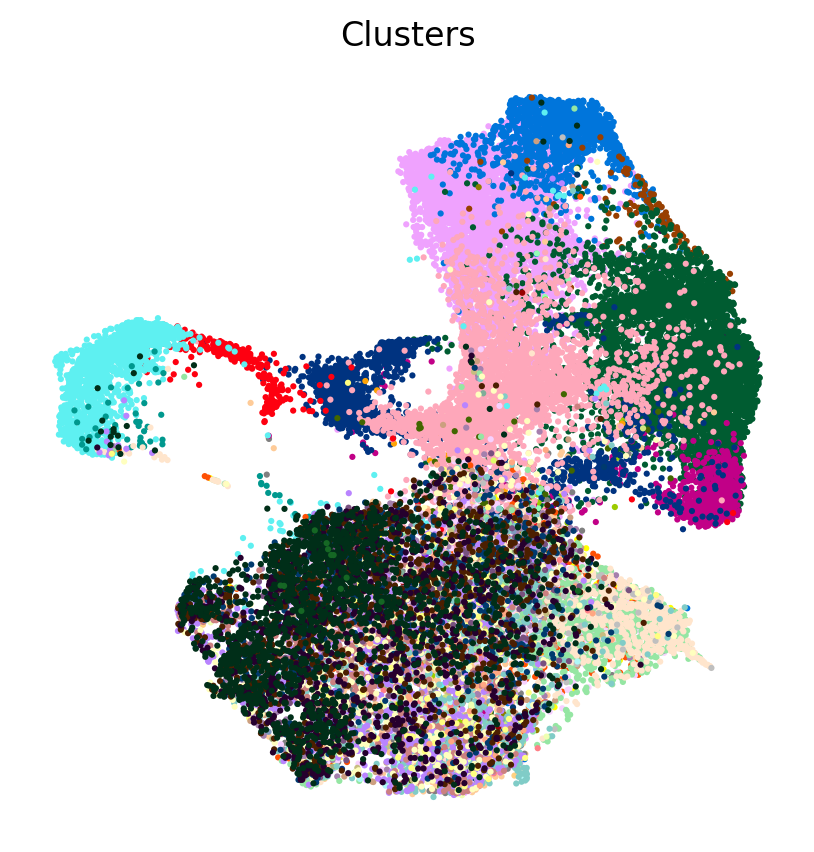

In [39]:
with loompy.connect(erythropoietic, 'r') as ds:
    plt.figure(None, (5, 5))
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c=colorize(ds.ca.Clusters), s=5, lw=0)
    plt.axis('off')
    plt.title('Clusters')
    plt.show()

In [40]:
colors = ['#333F50','#548235','#808080','#6A94C8','#FCC6E0','#B12484']

plt.figure(None, (5,5))
with loompy.connect(erythropoietic,'r') as ds:
    celltypes = np.unique(ds.ca.CellType)

    for i,a in enumerate(celltypes):
        ix = (ds.ca.CellType == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=5) 
        plt.axis('off')
        plt.title('Cell Types',fontsize=13)

AttributeError: '<class 'loompy.attribute_manager.AttributeManager'>' object has no attribute 'CellType'

<Figure size 500x500 with 0 Axes>

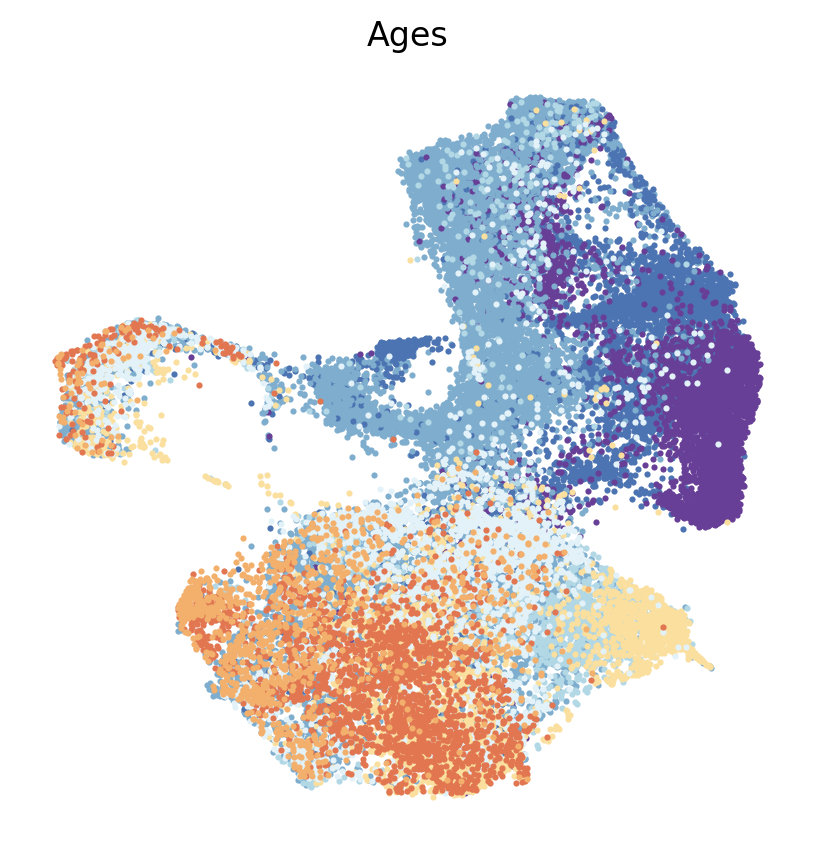

In [41]:
colors = ['#7EADCE','#4D74B2','#4D74B2','#683F97','#7EADCE','#B2D8E6','#FADF9E','#E3F2F9','#E3F2F9','#E17651','#F2B06C'] 
Age = ['7.5w','6.6w','6.7w','5.5w','7.6w','8.4w','10w','9w','9.9w','13.5w','12w']

plt.figure(None, (5,5)) 
with loompy.connect(erythropoietic, 'r') as ds:

    for i,a in enumerate(Age):
        exp = ds.ca.Agetext
        ix = (ds.ca.Agetext == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=5) 
        plt.axis('off')
        plt.title('Ages')